In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_excel("Job Trends.xlsx")

In [3]:
df.head()

,Job Role,Company,City,State,Job Description,Eligibility/Skills,Platform
0,"Analyst, Healthcare Analyst, SQL",Lensa,Orlando,FL,"Develop ad-hoc reports using SQL programming, ...",2-4 years increasingly complex database and da...,Linkedin
1,Business Analyst I,Centene Corporation,NaN,FL,Perform various analysis and interpretation to...,Bachelor’s degree in related field or equivale...,Linkedin
2,Business Analyst,Kforce Inc,Orlando,FL,Execute complex initiatives to implement and ...,Bachelor's degree is required in Business or ...,Linkedin
3,Business Analyst,"BackInTheBlack, LLC",Remote,Remote,As a Business Analyst you will interact with s...,"B.S. or Associate degree in Computer Science, ...",Linkedin
4,Business Intelligence Analyst 1,WEX,NaN,Maine,Proactively identify and analyze key sales per...,\nBachelor's degree in Business Administration...,Linkedin


In [4]:
#Converting all the text to Lower case and removing punctuations for skills and job description

df ['Eligibility/Skills'] = (df ['Eligibility/Skills']
                             .astype(str)
                             .str.lower()
                             .str.replace(r'[^\w\s]', '', regex=True))
df ['Job Description'] = (df ['Job Description']
                             .astype(str)
                             .str.lower()
                             .str.replace(r'[^\w\s]', '', regex=True))
df.head()

,Job Role,Company,City,State,Job Description,Eligibility/Skills,Platform
0,"Analyst, Healthcare Analyst, SQL",Lensa,Orlando,FL,develop adhoc reports using sql programming sq...,24 years increasingly complex database and dat...,Linkedin
1,Business Analyst I,Centene Corporation,NaN,FL,perform various analysis and interpretation to...,bachelors degree in related field or equivalen...,Linkedin
2,Business Analyst,Kforce Inc,Orlando,FL,execute complex initiatives to implement and ...,bachelors degree is required in business or m...,Linkedin
3,Business Analyst,"BackInTheBlack, LLC",Remote,Remote,as a business analyst you will interact with s...,bs or associate degree in computer science inf...,Linkedin
4,Business Intelligence Analyst 1,WEX,NaN,Maine,proactively identify and analyze key sales per...,\nbachelors degree in business administration ...,Linkedin


In [5]:
# Removing stop words like "a, the, is, and, an" for eliminating noise 
# nltk is Natural Language Toolkit that performs text mining
import nltk
nltk.corpus.stopwords
df.head()

,Job Role,Company,City,State,Job Description,Eligibility/Skills,Platform
0,"Analyst, Healthcare Analyst, SQL",Lensa,Orlando,FL,develop adhoc reports using sql programming sq...,24 years increasingly complex database and dat...,Linkedin
1,Business Analyst I,Centene Corporation,NaN,FL,perform various analysis and interpretation to...,bachelors degree in related field or equivalen...,Linkedin
2,Business Analyst,Kforce Inc,Orlando,FL,execute complex initiatives to implement and ...,bachelors degree is required in business or m...,Linkedin
3,Business Analyst,"BackInTheBlack, LLC",Remote,Remote,as a business analyst you will interact with s...,bs or associate degree in computer science inf...,Linkedin
4,Business Intelligence Analyst 1,WEX,NaN,Maine,proactively identify and analyze key sales per...,\nbachelors degree in business administration ...,Linkedin


In [6]:
from collections import Counter
jd_counter = Counter(df['Job Description'])
skill_counter = Counter(df['Eligibility/Skills'])
jd_counter

Counter({'nan': 2,
         'develop adhoc reports using sql programming sql server reporting services ssrs medinsight rxnavigator crystal reports executive dashboard and other analytic  programming tools as needed \ngenerate and distribute standard reports on schedule using sql excel and other reporting software \ncollects and documents report  programming requirements from requestors to ensure appropriate creation of reports and analyses uses peertopeer review process and enduser consultation to reduce report writing errors and rework \nidentify and complete report enhancementsfixes modify reports in response to approved change requests retain old and new report design for audit trail purposes \nanalyze data sets and trends for anomalies outliers trend changes and opportunities \ncreate comprehensive workflows for the production and distribution of assigned reports document reporting processes and procedures \nassist with completion of special projects as requested by various interna

In [7]:
df_jd_counter = pd.DataFrame(jd_counter.items(), columns=['JD', 'Total_count'])
df_jd_counter.head()

,JD,Total_count
0,develop adhoc reports using sql programming sq...,1
1,perform various analysis and interpretation to...,1
2,execute complex initiatives to implement and ...,1
3,as a business analyst you will interact with s...,1
4,proactively identify and analyze key sales per...,1


In [8]:
df_skill_counter = pd.DataFrame(skill_counter.items(), columns=['Skills', 'Total_count'])
df_skill_counter.head()

,Skills,Total_count
0,24 years increasingly complex database and dat...,1
1,bachelors degree in related field or equivalen...,1
2,bachelors degree is required in business or m...,1
3,bs or associate degree in computer science inf...,1
4,\nbachelors degree in business administration ...,1


## Wordcloud to see the most often repeated word 

In [10]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 320.0 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/301.2 kB 656.4 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.1 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


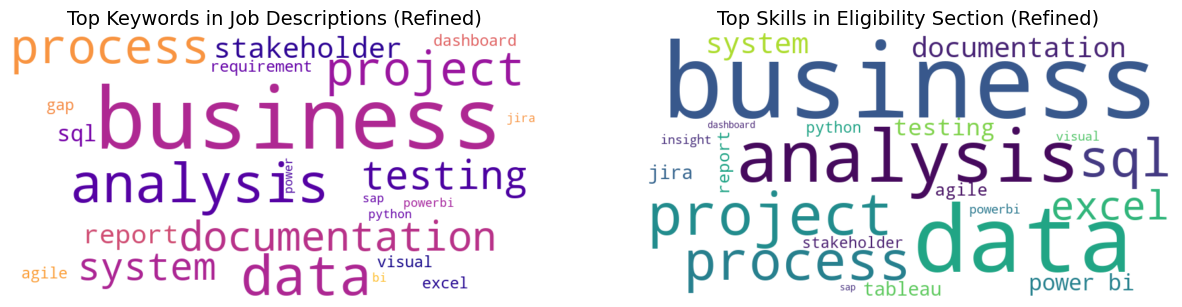

In [12]:
import re
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# 1️⃣ Define custom stopwords (same as before)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update([
    'experience', 'knowledge', 'ability', 'skills', 'skill', 'year', 'years', 'required', 'preferred',
    'excellent', 'strong', 'understanding', 'familiarity', 'management', 'proficiency', 
    'including', 'environment', 'tools', 'work', 'problem', 'solving', 'communication',
    'degree', 'bachelor', 'masters', 'related', 'education', 'field', 'team', 'support'
])

# 2️⃣ Combine all words into text form (if using Counters, you can join keys)
jd_text = ' '.join(jd_counter.keys()).lower()
skills_text = ' '.join(skill_counter.keys()).lower()

# 3️⃣ Keep only meaningful technical/business terms using regex
# (Add more as needed based on your dataset)
allowed_pattern = r'\b(sql|python|power\s?bi|tableau|excel|r|data|analysis|report|dashboard|kpi|requirement|stakeholder|visual|jira|agile|scrum|sap|business|system|process|gap|testing|documentation|insight|project)\b'

jd_filtered = ' '.join(re.findall(allowed_pattern, jd_text))
skills_filtered = ' '.join(re.findall(allowed_pattern, skills_text))

# 4️⃣ Generate cleaned word clouds
wordcloud_jd = WordCloud(width=800, height=400, background_color='white', 
                         stopwords=custom_stopwords, colormap='plasma').generate(jd_filtered)

wordcloud_skills = WordCloud(width=800, height=400, background_color='white', 
                             stopwords=custom_stopwords, colormap='viridis').generate(skills_filtered)

# 5️⃣ Display both
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(wordcloud_jd, interpolation='bilinear')
ax[0].set_title('Top Keywords in Job Descriptions (Refined)', fontsize=14)
ax[0].axis('off')

ax[1].imshow(wordcloud_skills, interpolation='bilinear')
ax[1].set_title('Top Skills in Eligibility Section (Refined)', fontsize=14)
ax[1].axis('off')

plt.show()

## Frequency Bar chart for Top Skills

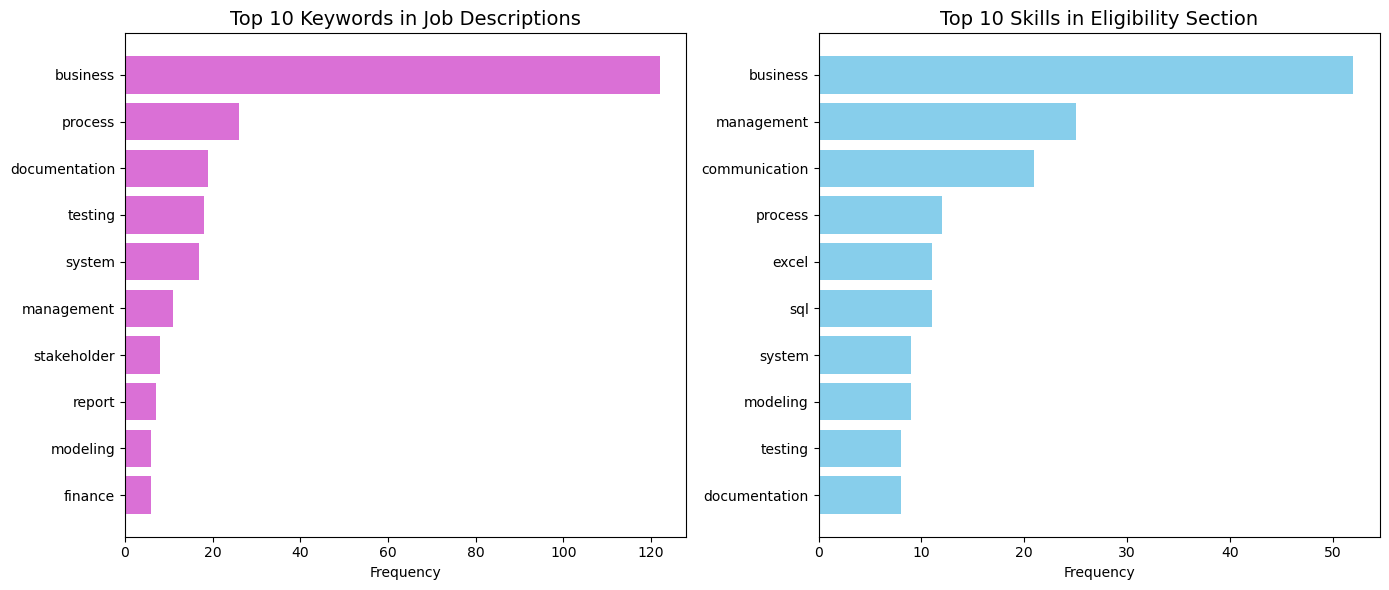

In [17]:
# Combine text from columns into one string
jd_text = ' '.join(df['Job Description'].astype(str).tolist()).lower()
skill_text = ' '.join(df['Eligibility/Skills'].astype(str).tolist()).lower()

# Define a pattern to capture meaningful technical/business words
pattern = r'\b(sql|python|excel|tableau|power\s?bi|r|dashboard|kpi|requirement|stakeholder|visual|jira|agile|scrum|sap|visio|business|system|process|gap|testing|documentation|insight|report|tableau|master\s|finance|health|information\?system\s|communication|management|Azure|Devops|visualbasic|waterfall|lifecycle|modeling|flowchart)\b'

# Find all matches
jd_words = re.findall(pattern, jd_text)
skill_words = re.findall(pattern, skill_text)

# Count word frequencies
jd_counter = Counter(jd_words)
skill_counter = Counter(skill_words)

# Convert to DataFrames
df_jd_counter = pd.DataFrame(jd_counter.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)
df_skill_counter = pd.DataFrame(skill_counter.items(), columns=['Skill', 'Count']).sort_values(by='Count', ascending=False)

# Select top 10
top_jd = df_jd_counter.head(10)
top_skills = df_skill_counter.head(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Job Description chart
ax[0].barh(top_jd['Skill'], top_jd['Count'], color='orchid')
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Keywords in Job Descriptions', fontsize=14)
ax[0].set_xlabel('Frequency')

# Eligibility chart
ax[1].barh(top_skills['Skill'], top_skills['Count'], color='skyblue')
ax[1].invert_yaxis()
ax[1].set_title('Top 10 Skills in Eligibility Section', fontsize=14)
ax[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


## Insights with location and other parameters 

C:\Users\vishh\AppData\Local\Temp\ipykernel_16196\1604431699.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=skill_freq[skill_freq['skill'].isin(top_skills)], y='skill', x='count', palette='viridis')


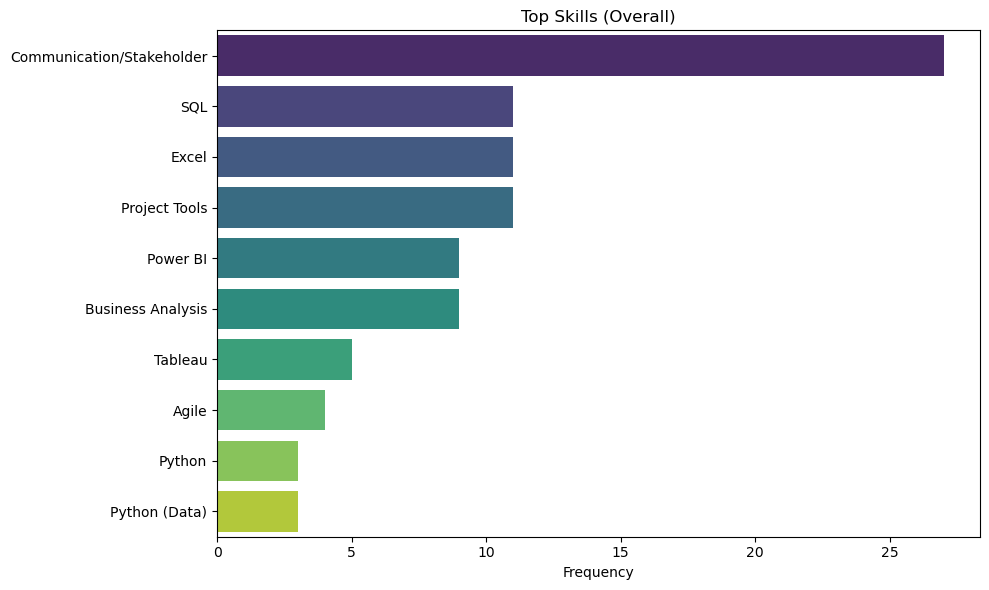

<Figure size 1200x600 with 0 Axes>

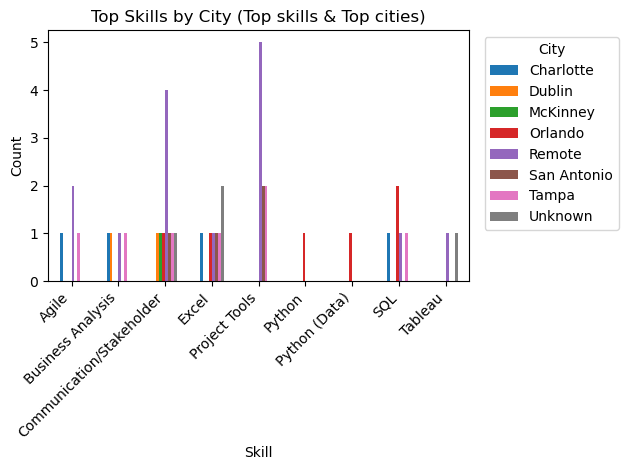

Top locations per skill (filtered):
       City                     skill  count
     Remote                     Agile      2
  Charlotte                     Agile      1
      Tampa                     Agile      1
  Charlotte         Business Analysis      1
     Dublin         Business Analysis      1
     Remote         Business Analysis      1
      Tampa         Business Analysis      1
     Remote Communication/Stakeholder      4
     Dublin Communication/Stakeholder      1
   McKinney Communication/Stakeholder      1
    Orlando Communication/Stakeholder      1
San Antonio Communication/Stakeholder      1
    Unknown                     Excel      2
  Charlotte                     Excel      1
    Orlando                     Excel      1
     Remote                     Excel      1
San Antonio                     Excel      1
     Remote             Project Tools      5
San Antonio             Project Tools      2
      Tampa             Project Tools      2
    Orlando        

In [23]:
df.columns = [c.strip() for c in df.columns]

# --- Normalize text fields ---
df['Eligibility/Skills'] = df['Eligibility/Skills'].fillna('').astype(str).str.lower()
df['Job Description'] = df['Job Description'].fillna('').astype(str).str.lower()
df['City'] = df['City'].fillna('Unknown').astype(str)
df['State'] = df['State'].fillna('Unknown').astype(str)

# --- Define skill patterns and normalization map ---
# Add or edit entries according to your data
skill_patterns = {
    r'\b(power[\s\-]?bi|ms[\s\-]?power[\s\-]?bi)\b': 'Power BI',
    r'\b(tableau)\b': 'Tableau',
    r'\b(sql|mysql|postgres|postgresql|sql\s*server|oracle)\b': 'SQL',
    r'\b(python)\b': 'Python',
    r'\b(\br\b|\br[\s,]|\br$)': 'R',
    r'\b(excel|ms\s*excel|advanced\s*excel|vlookup|xlookup|pivot)\b': 'Excel',
    r'\b(power\s*dax|dax)\b': 'DAX',
    r'\b(python|pandas|numpy|scikit[-\s]?learn)\b': 'Python (Data)',
    r'\b(aws|amazon\s*web\s*services)\b': 'AWS',
    r'\b(azure|microsoft\s*azure)\b': 'Azure',
    r'\b(etl|talend|informatica|airbyte|fivetran|glue|ssis|azure\s*data\s*factory)\b': 'ETL Tools',
    r'\b(snowflake)\b': 'Snowflake',
    r'\b(alteryx)\b': 'Alteryx',
    r'\b(sas)\b': 'SAS',
    r'\b(power\s*apps|power\s*platform)\b': 'Power Platform',
    r'\b(business\s*analysis|business\s*analyst|business\s*analysis)\b': 'Business Analysis',
    r'\b(data\s*visuali[sz]ation|visualization|visualisation|dashboard|data\s*viz)\b': 'Data Visualization',
    r'\b(kpi|key\s*performance\s*indicator)\b': 'KPI',
    r'\b(communication|stakeholder|presentation)\b': 'Communication/Stakeholder',
    r'\b(agile|scrum|kanban|safe)\b': 'Agile',
    r'\b(jira|confluence|trello|asana|monday)\b': 'Project Tools',
    # add more domain-specific terms you expect
}

# precompile regexs for speed
compiled = [(re.compile(pat, flags=re.I), rep) for pat, rep in skill_patterns.items()]

# --- Function to extract normalized skills from text (eligibility/skills + job description optionally) ---
def extract_skills_from_text(text):
    found = []
    # replace punctuation with space to avoid merging words
    text = re.sub(r'[^\w\s]', ' ', text.lower())
    for pattern, label in compiled:
        if pattern.search(text):
            # Count occurrences (optional - here we just note presence)
            occurrences = len(pattern.findall(text))
            # append label occurrence times so frequency reflects repeats if desired
            found.extend([label] * occurrences)
    return found

# --- Apply extraction row-wise to eligibility/skills (you can include job description too) ---
# If eligibility/skills is a comma-separated list already, these will be found by patterns above.
df['extracted_skills'] = df['Eligibility/Skills'].apply(extract_skills_from_text)

# Optional: also look into job description if you want combined counts
# df['extracted_skills'] += df['job description'].apply(extract_skills_from_text)

# --- Explode into one-row-per-skill per job posting ---
df_exploded = df.explode('extracted_skills').dropna(subset=['extracted_skills']).copy()
df_exploded.rename(columns={'extracted_skills': 'skill'}, inplace=True)

# --- Aggregate counts by skill and location ---
# Overall skill frequency
skill_freq = df_exploded['skill'].value_counts().reset_index()
skill_freq.columns = ['skill', 'count']

# Skill frequency by city (or state) - choose whichever granularity you prefer
by_city_skill = df_exploded.groupby(['City', 'skill']).size().reset_index(name='count')

# For plotting readability, pick top N skills overall, and top M cities by total postings
TOP_SKILLS = 10
TOP_CITIES = 8

top_skills = skill_freq.head(TOP_SKILLS)['skill'].tolist()
top_cities = df['City'].value_counts().head(TOP_CITIES).index.tolist()

# Filter the city-skill table to those sets
by_city_skill_filt = by_city_skill[by_city_skill['skill'].isin(top_skills) & by_city_skill['City'].isin(top_cities)]

# pivot for stacked/grouped bar plotting
pivot = by_city_skill_filt.pivot(index='skill', columns='City', values='count').fillna(0)

# --- Plot 1: Overall top skills ---
plt.figure(figsize=(10, 6))
sns.barplot(data=skill_freq[skill_freq['skill'].isin(top_skills)], y='skill', x='count', palette='viridis')
plt.title('Top Skills (Overall)')
plt.xlabel('Frequency')
plt.ylabel('')
plt.tight_layout()
plt.show()

# --- Plot 2: Top Skills by City (stacked-like grouped bars) ---
plt.figure(figsize=(12, 6))
pivot.plot(kind='bar', stacked=False)  # stacked=False shows grouped bars; set True for stacked
plt.title('Top Skills by City (Top skills & Top cities)')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='City', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Extra insight: skill -> top cities table ---
skill_city_table = by_city_skill_filt.sort_values(['skill','count'], ascending=[True, False])
print("Top locations per skill (filtered):")
print(skill_city_table.groupby('skill').head(5).to_string(index=False))

<Figure size 1200x600 with 0 Axes>

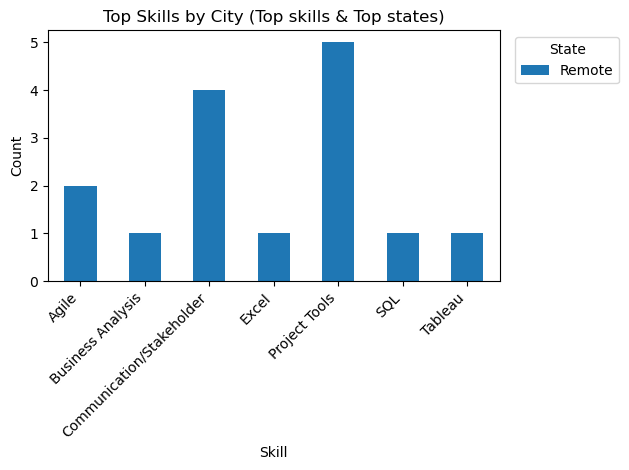

In [33]:

# Skill frequency by city (or state) - choose whichever granularity you prefer
by_city_skill = df_exploded.groupby(['State', 'skill']).size().reset_index(name='count')

# For plotting readability, pick top N skills overall, and top M cities by total postings
TOP_SKILLS = 10
TOP_STATES = 10

top_skills = skill_freq.head(TOP_SKILLS)['skill'].tolist()
top_state = df['State'].value_counts().head(TOP_STATES).index.tolist()

# Filter the state-skill table to those sets
by_state_skill_filt = by_city_skill[by_city_skill['skill'].isin(top_skills) & by_city_skill['State'].isin(top_cities)]

# pivot for stacked/grouped bar plotting
pivot = by_state_skill_filt.pivot(index='skill', columns='State', values='count').fillna(0)

# --- Plot: Top Skills by State (stacked-like grouped bars) ---
plt.figure(figsize=(12, 6))
pivot.plot(kind='bar', stacked=False)  # stacked=False shows grouped bars; set True for stacked
plt.title('Top Skills by City (Top skills & Top states)')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='State', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()